In [18]:
#Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [19]:
#Loading the dataset and performing an initial inspection
df = pd.read_csv('climate_action_data.csv')

#Initial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [20]:
#More inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [21]:
#Descriptive statistics
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [22]:
df.shape

(913, 10)

In [23]:
#Check for missing or null values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [24]:
#Handling missing values
#For categorical columns, we fill in missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
        
# Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [25]:
#Dealing with data in wrong format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle Soil Moisture column with 'error' values
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Soil_Moisture(%)' with the median
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())

# Handle Soil pH column with 'error' values
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Soil pH' with the median
df['Soil_pH'] = df['Soil_pH'].fillna(df['Soil_pH'].median())

# Handle Temperature column with 'error' values
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Temperature(C)' with the median
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].median())

# Handle Humidity column with 'error' values
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Humidity(%)' with the median
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())

# Handle Fertilizer_Recommended column with 'error' values
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Fertilizer_Recommended(kg/ha)' with the median
df['Fertilizer_Recommended(kg/ha)'] = df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())

# Handle Irrigation_Recommended column with 'error' values
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Irrigation_Recommended(mm)' with the median
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())

In [26]:
# Wrong Data Types
price_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in price_cols:
    if col in df.columns:
        
# Remove extreme outliers (beyond 3 standard deviations) and replace them with the median
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())
       

In [27]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 111


In [28]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 802
Number of duplicate dates: 3


(799, 10)

In [29]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

In [30]:
# Descriptive statistics
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2026-02-04 07:45:33.834586624,44.790970,6.252997,26.468836,60.107009,87.401877,17.390989
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.955000,5.330000,22.300000,46.100000,57.850000,11.300000
50%,2026-02-03 12:00:00,45.220000,6.295000,26.600000,59.600000,85.900000,17.400000
75%,2026-08-23 18:00:00,62.615000,7.080000,30.600000,75.300000,117.650000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460591,1.021265,4.867592,17.404889,34.805589,7.138402


Text(0.5, 0, 'Crop Type')

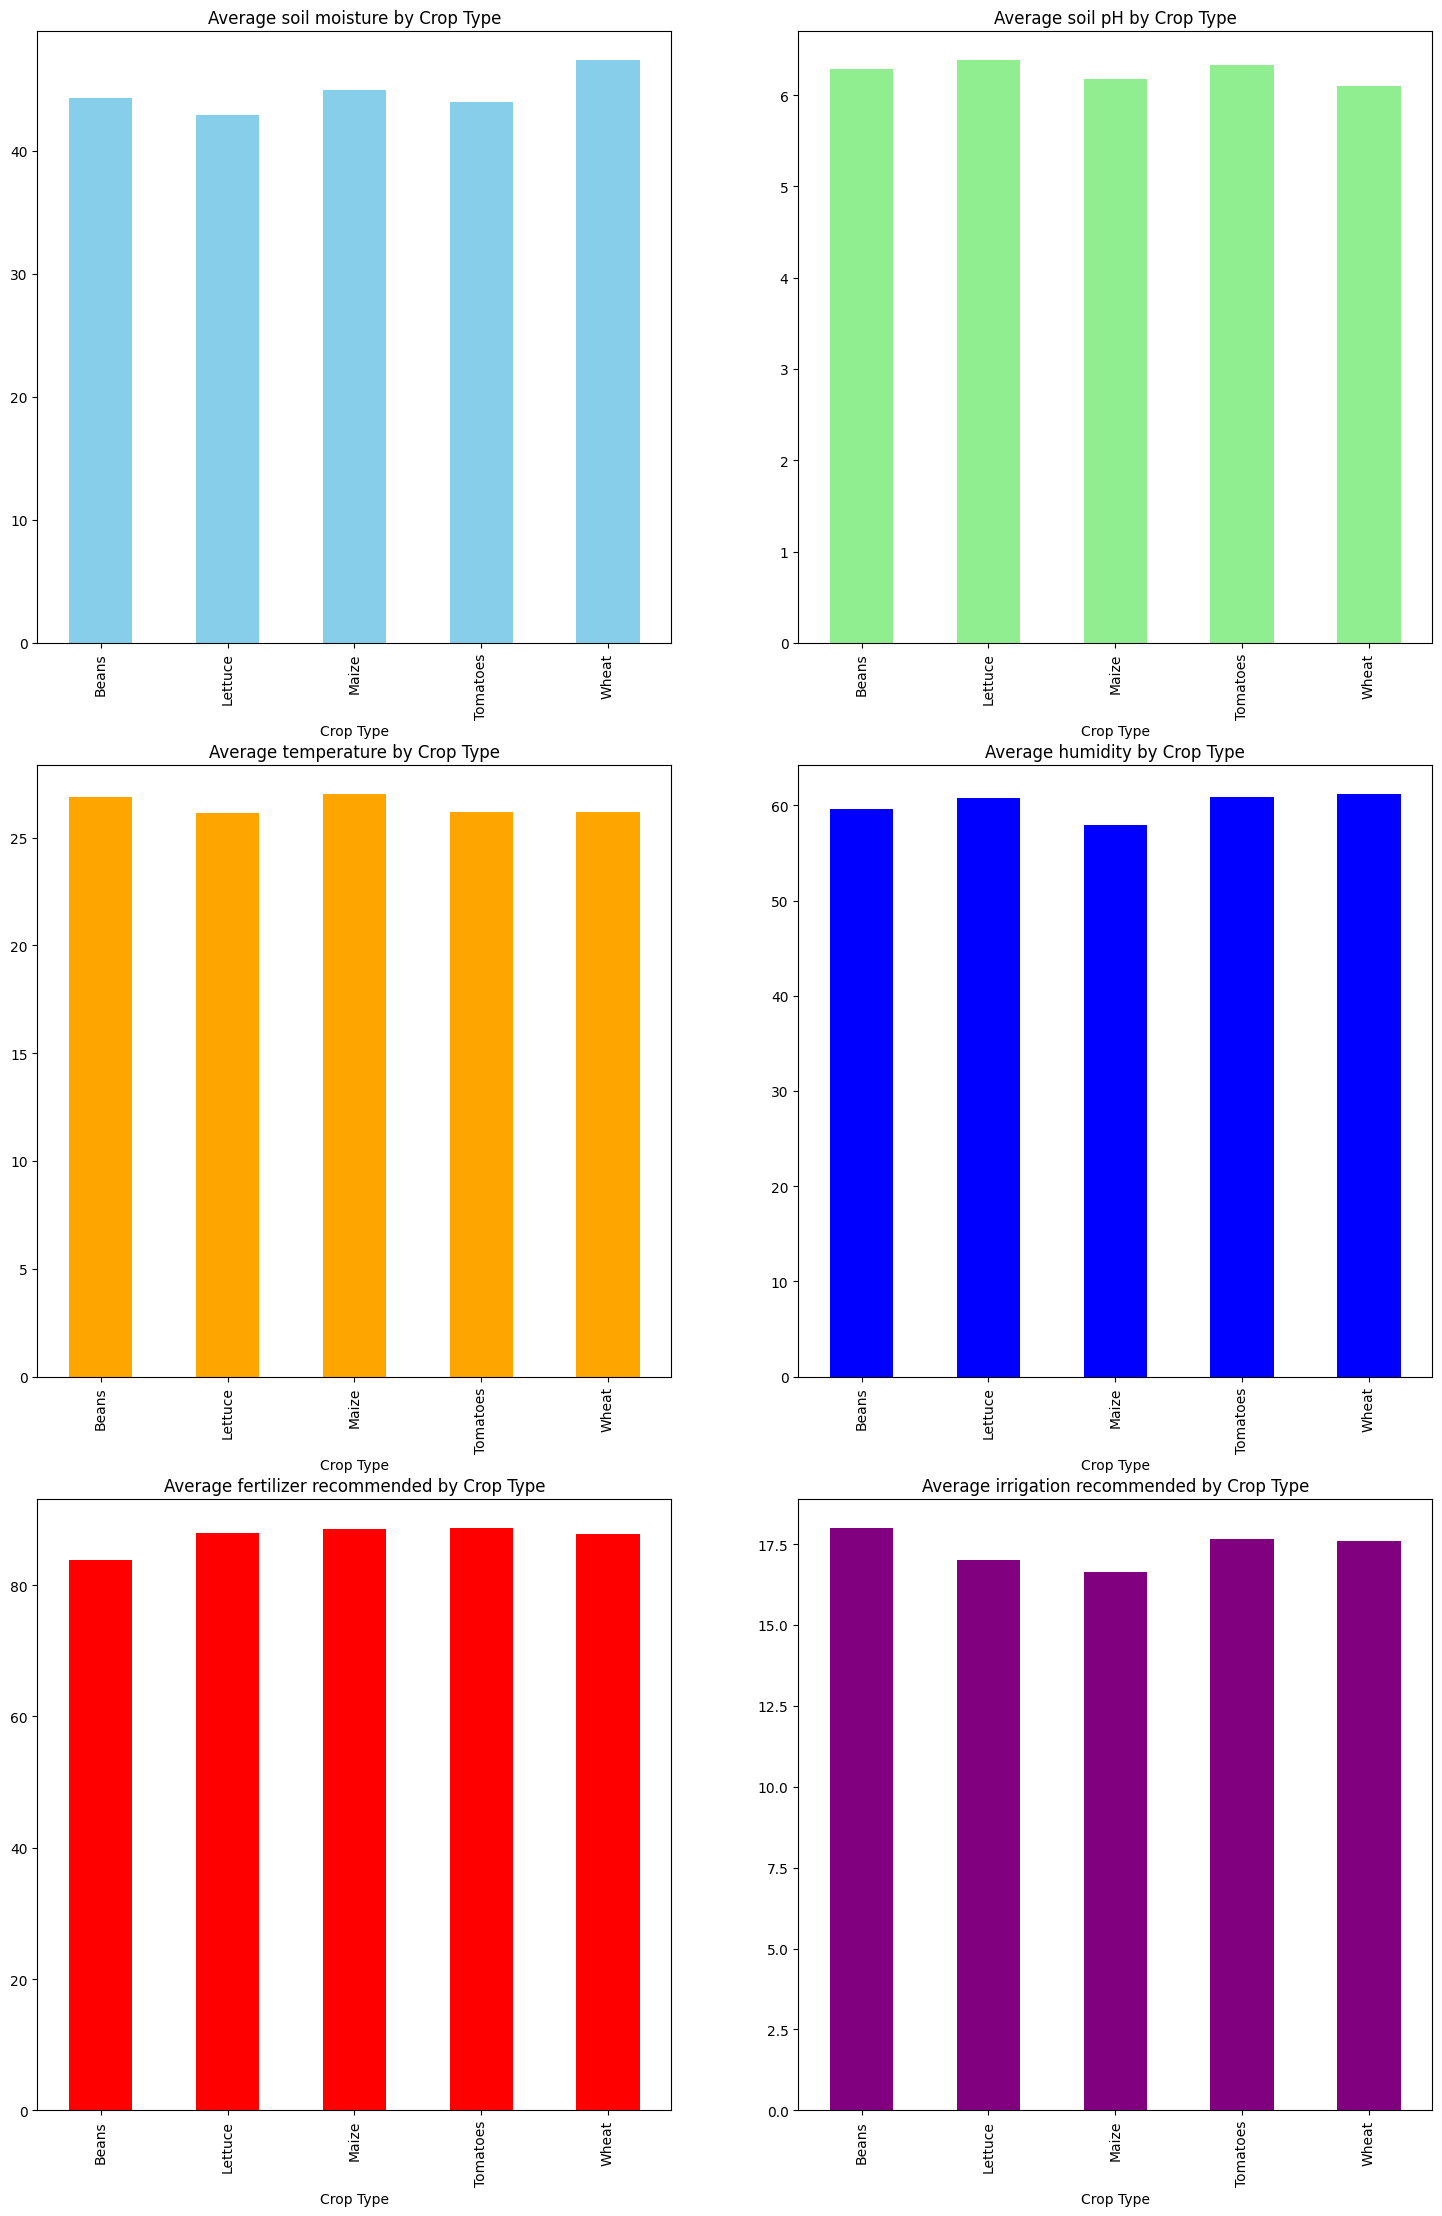

In [38]:
# Analyzing numeric variables by crop type
#Soil Moisture
soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()

#Soil pH
soil_ph = df.groupby('Crop_Type')['Soil_pH'].mean()

#Temperature
temperature = df.groupby('Crop_Type')['Temperature(C)'].mean()

#Humidity
humidity = df.groupby('Crop_Type')['Humidity(%)'].mean()

#Fertilizer Recommended
fertilizer_recommended = df.groupby('Crop_Type')['Fertilizer_Recommended(kg/ha)'].mean()

#Irrigation Recommended
irrigation_recommended = df.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()

# Plotting the average soil moisture by crop type
plt.figure(figsize=(18, 27))
plt.subplot(3, 2, 1)
soil_moisture.plot(kind='bar', color='skyblue')
plt.title('Average soil moisture by Crop Type')
plt.xlabel('Crop Type')

# Plotting the average soil pH by crop type
plt.subplot(3, 2, 2)
soil_ph.plot(kind='bar', color='lightgreen')
plt.title('Average soil pH by Crop Type')
plt.xlabel('Crop Type')

# Plotting the average temperature by crop type
plt.subplot(3, 2, 3)
temperature.plot(kind='bar', color='orange')
plt.title('Average temperature by Crop Type')
plt.xlabel('Crop Type')

# Plotting the average humidity by crop type
plt.subplot(3, 2, 4)
humidity.plot(kind='bar', color='blue')
plt.title('Average humidity by Crop Type')
plt.xlabel('Crop Type')

# Plotting the average fertilizer recommended by crop type
plt.subplot(3, 2, 5)
fertilizer_recommended.plot(kind='bar', color='red')
plt.title('Average fertilizer recommended by Crop Type')
plt.xlabel('Crop Type')

# Plotting the average irrigation recommended by crop type
plt.subplot(3, 2, 6)
irrigation_recommended.plot(kind='bar', color='purple')
plt.title('Average irrigation recommended by Crop Type')
plt.xlabel('Crop Type')

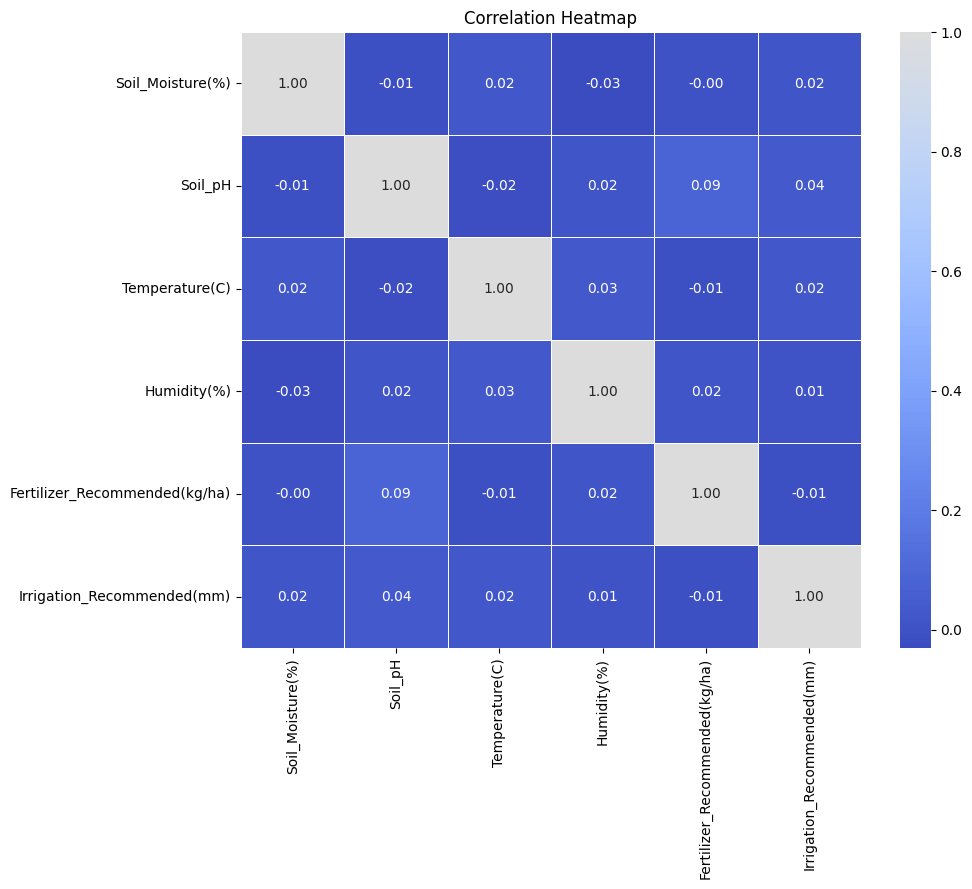

In [39]:
#Plotting the correlation matrix
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Variables that most influence fertilizer recommendation
#1. Soil pH: As the soil pH increases, the fertiliser recommendation slightly increases.
#2. Temperature: As the temperature increases, the fertilizer recommendation slightly decreases.

#Crop with highest average soil moisture: Wheat

#Irrigation adjustments for crops experiencing temperatures above 30 degrees
#As the temperature rises, the recommended irrigation should be slightly increased.

In [40]:
#Exporting the cleaned data set
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)

print("Cleaned dataset saved as 'cleaned_precision_agriculture_data.csv'")

Cleaned dataset saved as 'cleaned_precision_agriculture_data.csv'


In [ ]:
#Insights
#Soil moisture does not in any way affect the amount of fertilizers recommended.
#As the soil pH increases, the amount of recommended fertilizer also increases.
#As the temperature increases, the amount of recommended fertilizers slightly reduces.
#As the humidity rises, the amount of recommended fertilisers slightly rises.
#As the amount of recommended fertilizers increases, the recommended irrigation slightly reduces. 
#As soil moisture increases,the recommended irrigation slightly increases.
#As the soil pH increases, the recommended irrigation slightly increases.
#As the temperature increases, the recommended irrigation slightly increases.
#As the humidity rises, the recommended irrigation slightly rises.


#Recommendations
#A decrease in soil moisture, soil pH, temperature or humidity will lead to a decrease in the amount of irrigation needed.
#A reduction in soil pH and humidity will reduce the amount of fertilizers required.
#An increase in temperature will reduce the amount of required fertilisers.